# Buscamos relacion entre el dia de la semana en que parte el vuelo, y la probabilidad de que este demorado

In [14]:
import sqlite3
import pandas as pd
import numpy as np                   # Para cosas de álgebra lineal
import matplotlib.pyplot as plt      # Para gráficos
import seaborn as sns                # Para gráficos lindos :^)
sns.set_style("darkgrid")
from sklearn import linear_model     # Para CML
conn = sqlite3.connect('../vuelos.db')

import warnings
warnings.filterwarnings('ignore')

# To do:
    - Al analizar todos los años, primero mostrar como cae la cantidad de vuelos post 2001, y despues sacar todo el año (desde septiembre 2001 hasta septiembre 2002), diciendo que todo el año es un outlier y daña las metricas (me dijo nestor que estaba bien)

In [28]:
df = pd.read_sql_query('''
select o.DayOfWeek as DayOfWeek, count(*)*1.0/o2.amount as DelayPercentage, o2.amount as TotalAmount
from ontime o
join (select DayOfWeek, count(*) as amount from ontime where month = {month} and DayOfWeek != "NA" and year >= {year} group by DayOfWeek)
  as o2 on o2.DayOfWeek = o.DayOfWeek
where o.DayOfWeek != "NA"  and
  o.DepDelay >= 15
  and year >= {year}
  and month = {month}
group by o.DayOfWeek
order by o.DayOfWeek asc;'''.format(year=2007, month=6), conn)
    
print(df)

   DayOfWeek  DelayPercentage  TotalAmount
0          1         0.268261       190374
1          2         0.264386       167853
2          3         0.272011       168850
3          4         0.285656       170236
4          5         0.285363       192036
5          6         0.231482       166747
6          7         0.268080       181849


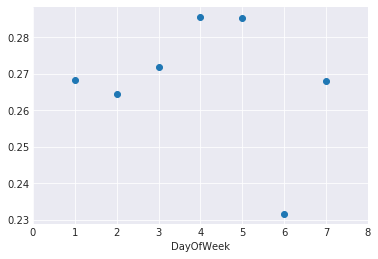

In [29]:
sns.tsplot(time=df['DayOfWeek'], data=df['DelayPercentage'], interpolate=False)
plt.show()